In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/content/drive/MyDrive/train.csv')

In [3]:
test = pd.read_csv('/content/drive/MyDrive/test.csv')

In [4]:
data_missing_cols = data.columns[data.isnull().any()].to_list
test_missing_cols = test.columns[test.isnull().any()].to_list

In [5]:
print(data_missing_cols)
print(test_missing_cols)

<bound method IndexOpsMixin.tolist of Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')>
<bound method IndexOpsMixin.tolist of Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')>


In [6]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.2 MB/s eta 0:00:00


In [7]:
data['log_SalePrice'] = np.log(data['SalePrice'])
target = data['log_SalePrice']
data.drop(columns = ['SalePrice', 'log_SalePrice'], axis = 1, inplace= True)

In [8]:
data[['MSSubClass','OverallCond','OverallQual']] = data[['MSSubClass','OverallCond','OverallQual']].astype(str)
test[['MSSubClass','OverallCond','OverallQual']] = test[['MSSubClass','OverallCond','OverallQual']].astype(str)

In [9]:
data.drop('Utilities', axis= 1, inplace = True)
test.drop('Utilities', axis= 1, inplace = True)

In [10]:
data.drop('Id', axis= 1, inplace = True)
test.drop('Id', axis= 1, inplace = True)

In [11]:
cat_features = data.select_dtypes(include=['object']).columns.tolist()
num_features = list(set(data.columns) - set(cat_features))

In [12]:
print(len(cat_features) + len(num_features))

78


In [13]:
data_easy_imput = data.copy()
test_easy_imput = test.copy()
data_easy_imput[cat_features] = data[cat_features].fillna('NaN')
test_easy_imput[cat_features] = test[cat_features].fillna('NaN')


In [14]:
for feature in num_features:
 data_easy_imput[feature] = data_easy_imput[feature].fillna(data_easy_imput[feature].mean())
for feature in num_features:
  test_easy_imput[feature] = test_easy_imput[feature].fillna(test_easy_imput[feature].mean())

In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
"""import catboost as cb
from sklearn.model_selection import GridSearchCV
param_grid = {
    'learning_rate': [0.1],
    'depth': [10]
}
model = cb.CatBoostRegressor(loss_function='RMSE', random_seed=42, iterations=300)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=10, n_jobs=-1)
grid_search.fit(data_easy_imput, target, cat_features=cat_features)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_"""

"import catboost as cb\nfrom sklearn.model_selection import GridSearchCV\nparam_grid = {\n    'learning_rate': [0.1],\n    'depth': [10]\n}\nmodel = cb.CatBoostRegressor(loss_function='RMSE', random_seed=42, iterations=300)\ngrid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=10, n_jobs=-1)\ngrid_search.fit(data_easy_imput, target, cat_features=cat_features)\nbest_params = grid_search.best_params_\nbest_model = grid_search.best_estimator_"

In [17]:
"""y_pred = best_model.predict(data_easy_imput)
rmse = mean_squared_error(target, y_pred, squared=False)
print(f'RMSE: {rmse}')"""

"y_pred = best_model.predict(data_easy_imput)\nrmse = mean_squared_error(target, y_pred, squared=False)\nprint(f'RMSE: {rmse}')"

In [18]:
test['PoolQC'] = test.apply(lambda x: "NA" if (x['PoolArea'] == 0) and pd.isna(x['PoolQC']) else x['PoolQC'], axis = 1)
test['MasVnrType'] = test.apply(lambda x: "None" if ((x['MasVnrArea'] == 0) and pd.isna(x['MasVnrType'])) else x['MasVnrType'], axis = 1)
test['BsmtQual'] = test.apply(lambda l: "NA" if ((l['TotalBsmtSF'] == 0) and pd.isna(l['BsmtQual'])) else l['BsmtQual'], axis = 1)
test['BsmtCond'] = test.apply(lambda l: "NA" if ((l['TotalBsmtSF'] == 0) and pd.isna(l['BsmtCond'])) else l['BsmtCond'], axis = 1)
test['BsmtExposure'] = test.apply(lambda l: "NA" if ((l['TotalBsmtSF'] == 0) and pd.isna(l['BsmtExposure'])) else l['BsmtExposure'], axis =1)
test['BsmtFinType1'] = test.apply(lambda l: "NA" if ((l['TotalBsmtSF'] == 0) and pd.isna(l['BsmtFinType1'])) else l['BsmtFinType1'], axis =1)
test['BsmtFinType2'] = test.apply(lambda l: "NA" if ((l['TotalBsmtSF'] == 0) and pd.isna(l['BsmtFinType2'])) else l['BsmtFinType2'], axis =1)
test['FireplaceQu'] = test.apply(lambda l: "NA" if ((l['Fireplaces'] == 0) and pd.isna(l['FireplaceQu'])) else l['FireplaceQu'], axis = 1)
test['GarageType'] = test.apply(lambda l: "NA" if ((l['GarageArea'] == 0) and pd.isna(l['GarageType'])) else l['GarageType'], axis = 1)
test['GarageYrBlt'] = test.apply(lambda l: 0 if ((l['GarageArea'] == 0) and pd.isna(l['GarageYrBlt'])) else l['GarageYrBlt'], axis = 1)
test['GarageFinish'] = test.apply(lambda l: "NA" if ((l['GarageArea'] == 0) and pd.isna(l['GarageFinish'])) else l['GarageFinish'], axis =1)
test['GarageQual'] = test.apply(lambda l: "NA" if ((l['GarageArea'] == 0) and pd.isna(l['GarageQual'])) else l['GarageQual'], axis =1)
test['GarageCond'] = test.apply(lambda l: "NA" if ((l['GarageArea'] == 0) and pd.isna(l['GarageCond'])) else l['GarageCond'], axis =1)

In [19]:
test_easy_imput_features = test[['Alley', 'MiscFeature', 'Fence']]
test_easy_imput_features.fillna(value = 'Na', inplace= True)
test[['Alley', 'MiscFeature', 'Fence']] = test_easy_imput_features

<ipython-input-19-ad10b01cc599>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_easy_imput_features.fillna(value = 'Na', inplace= True)


In [51]:
data['PoolQC'] = data.apply(lambda x: "NA" if (x['PoolArea'] == 0) and pd.isna(x['PoolQC']) else x['PoolQC'], axis = 1)
data['MasVnrType'] = data.apply(lambda x: "None" if ((x['MasVnrArea'] == 0) and pd.isna(x['MasVnrType'])) else x['MasVnrType'], axis = 1)
data['BsmtQual'] = data.apply(lambda l: "NA" if ((l['TotalBsmtSF'] == 0) and pd.isna(l['BsmtQual'])) else l['BsmtQual'], axis = 1)
data['BsmtCond'] = data.apply(lambda l: "NA" if ((l['TotalBsmtSF'] == 0) and pd.isna(l['BsmtCond'])) else l['BsmtCond'], axis = 1)
data['BsmtExposure'] = data.apply(lambda l: "NA" if ((l['TotalBsmtSF'] == 0) and pd.isna(l['BsmtExposure'])) else l['BsmtExposure'], axis =1)
data['BsmtFinType1'] = data.apply(lambda l: "NA" if ((l['TotalBsmtSF'] == 0) and pd.isna(l['BsmtFinType1'])) else l['BsmtFinType1'], axis =1)
data['BsmtFinType2'] = data.apply(lambda l: "NA" if ((l['TotalBsmtSF'] == 0) and pd.isna(l['BsmtFinType2'])) else l['BsmtFinType2'], axis =1)
data['FireplaceQu'] = data.apply(lambda l: "NA" if ((l['Fireplaces'] == 0) and pd.isna(l['FireplaceQu'])) else l['FireplaceQu'], axis = 1)
data['GarageType'] = data.apply(lambda l: "NA" if ((l['GarageArea'] == 0) and pd.isna(l['GarageType'])) else l['GarageType'], axis = 1)
data['GarageYrBlt'] = data.apply(lambda l: 0 if ((l['GarageArea'] == 0) and pd.isna(l['GarageYrBlt'])) else l['GarageYrBlt'], axis = 1)
data['GarageFinish'] = data.apply(lambda l: "NA" if ((l['GarageArea'] == 0) and pd.isna(l['GarageFinish'])) else l['GarageFinish'], axis =1)
data['GarageQual'] = data.apply(lambda l: "NA" if ((l['GarageArea'] == 0) and pd.isna(l['GarageQual'])) else l['GarageQual'], axis =1)
data['GarageCond'] = data.apply(lambda l: "NA" if ((l['GarageArea'] == 0) and pd.isna(l['GarageCond'])) else l['GarageCond'], axis =1)

In [21]:
data_easy_imput_features = data[['Alley', 'MiscFeature', 'Fence']]
data_easy_imput_features.fillna(value = 'Na', inplace= True)
data[['Alley', 'MiscFeature', 'Fence']] = data_easy_imput_features

<ipython-input-21-71093c04fca3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_easy_imput_features.fillna(value = 'Na', inplace= True)


In [22]:
data_easy_cat_imput = data.copy()
data_easy_cat_imput[cat_features] = data_easy_imput[cat_features].fillna("TrueNaN")
test_easy_cat_imput = test.copy()
test_easy_cat_imput[cat_features] = test_easy_imput[cat_features].fillna("TrueNaN")

In [23]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [24]:
cat_encoded_data_array = encoder.fit_transform(data_easy_cat_imput[cat_features])
cat_encoded_data_features = encoder.get_feature_names_out(cat_features)
cat_encoded_data = pd.DataFrame(cat_encoded_data_array, columns = cat_encoded_data_features)
data_easy_cat_imput_encoded = pd.concat([data_easy_cat_imput[num_features],cat_encoded_data], axis = 1)

In [25]:
cat_encoded_test_array = encoder.fit_transform(test_easy_cat_imput[cat_features])
cat_encoded_test_features = encoder.get_feature_names_out(cat_features)
cat_encoded_test = pd.DataFrame(cat_encoded_test_array, columns = cat_encoded_test_features)
test_easy_cat_imput_encoded = pd.concat([test_easy_cat_imput[num_features],cat_encoded_test], axis = 1)

In [26]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

list_data_imputed_KNN_uniform = []
for i in range(5): list_data_imputed_KNN_uniform.append(data_easy_cat_imput_encoded)
list_data_imputed_KNN_distance = []
for i in range(5):  list_data_imputed_KNN_distance.append( data_easy_cat_imput_encoded)

for K in range(5):

  list_data_imputed_KNN_uniform[K][cat_encoded_data_features] = scaler.fit_transform(list_data_imputed_KNN_uniform[K][cat_encoded_data_features])
  imputer = KNNImputer(n_neighbors = K+1, weights = 'uniform')
  list_data_imputed_KNN_uniform[K] = pd.DataFrame(imputer.fit_transform(list_data_imputed_KNN_uniform[K]), columns=list_data_imputed_KNN_uniform[K].columns.tolist())
  list_data_imputed_KNN_uniform[K] = pd.concat([list_data_imputed_KNN_uniform[K][num_features], data_easy_cat_imput[cat_features]], axis = 1)


for K in range(5):

  list_data_imputed_KNN_distance[K][cat_encoded_data_features] = scaler.fit_transform(list_data_imputed_KNN_distance[K][cat_encoded_data_features])
  imputer = KNNImputer(n_neighbors = K+1, weights = 'distance')
  list_data_imputed_KNN_distance[K] = pd.DataFrame(imputer.fit_transform(list_data_imputed_KNN_distance[K]), columns=list_data_imputed_KNN_distance[K].columns.tolist())
  list_data_imputed_KNN_distance[K] = pd.concat([list_data_imputed_KNN_distance[K][num_features], data_easy_cat_imput[cat_features]], axis = 1)

list_test_imputed_KNN_uniform = [test_easy_cat_imput_encoded, test_easy_cat_imput_encoded,
                                 test_easy_cat_imput_encoded, test_easy_cat_imput_encoded,
                                 test_easy_cat_imput_encoded]
list_test_imputed_KNN_distance = [test_easy_cat_imput_encoded, test_easy_cat_imput_encoded,
                                 test_easy_cat_imput_encoded, test_easy_cat_imput_encoded,
                                 test_easy_cat_imput_encoded]

for K in range(5):

  list_test_imputed_KNN_uniform[K][cat_encoded_test_features] = scaler.fit_transform(list_test_imputed_KNN_uniform[K][cat_encoded_test_features])
  imputer = KNNImputer(n_neighbors = K+1, weights = 'uniform')
  list_test_imputed_KNN_uniform[K] = pd.DataFrame(imputer.fit_transform(list_test_imputed_KNN_uniform[K]), columns=list_test_imputed_KNN_uniform[K].columns.tolist())
  list_test_imputed_KNN_uniform[K] = pd.concat([list_test_imputed_KNN_uniform[K][num_features], test_easy_cat_imput[cat_features]], axis = 1)

list_test_imputed_KNN_distance
for K in range(5):

  list_test_imputed_KNN_distance[K][cat_encoded_test_features] = scaler.fit_transform(list_test_imputed_KNN_distance[K][cat_encoded_test_features])
  imputer = KNNImputer(n_neighbors = K+1, weights = 'distance')
  list_test_imputed_KNN_distance[K] = pd.DataFrame(imputer.fit_transform(list_test_imputed_KNN_distance[K]), columns=list_test_imputed_KNN_distance[K].columns.tolist())
  list_test_imputed_KNN_distance[K] = pd.concat([list_test_imputed_KNN_distance[K][num_features], test_easy_cat_imput[cat_features]], axis = 1)

In [27]:
"""import catboost as cb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
y = target
uniform_losses = []
distance_losses = []
param_grid = {
    'learning_rate': [0.1],
    'depth': [10]
}
data_list = list_data_imputed_KNN_uniform
for i in range(5):
  X = data_list[i]
  model = cb.CatBoostRegressor(loss_function='RMSE', random_seed=42, iterations=300)
  grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
  grid_search.fit(X, y, cat_features = cat_features)
  best_model = grid_search.best_estimator_
  y_pred = best_model.predict(X)
  rmse = mean_squared_error(y, y_pred, squared=False)
  uniform_losses.append(rmse)
data_list = list_data_imputed_KNN_distance
for i in range(5):
  X = data_list[i]
  model = cb.CatBoostRegressor(loss_function='RMSE', random_seed=42, iterations=300)
  grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
  grid_search.fit(X, y, cat_features=cat_features)
  best_model = grid_search.best_estimator_
  y_pred = best_model.predict(X)
  rmse = mean_squared_error(y, y_pred, squared=False)
  distance_losses.append(rmse)"""

"import catboost as cb\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.metrics import mean_squared_error\ny = target\nuniform_losses = []\ndistance_losses = []\nparam_grid = {\n    'learning_rate': [0.1],\n    'depth': [10]\n}\ndata_list = list_data_imputed_KNN_uniform\nfor i in range(5):\n  X = data_list[i]\n  model = cb.CatBoostRegressor(loss_function='RMSE', random_seed=42, iterations=300)\n  grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)\n  grid_search.fit(X, y, cat_features = cat_features)\n  best_model = grid_search.best_estimator_\n  y_pred = best_model.predict(X)\n  rmse = mean_squared_error(y, y_pred, squared=False)\n  uniform_losses.append(rmse)\ndata_list = list_data_imputed_KNN_distance\nfor i in range(5):\n  X = data_list[i]\n  model = cb.CatBoostRegressor(loss_function='RMSE', random_seed=42, iterations=300)\n  grid_search = GridSearchCV(estimator=model, param_grid=param_grid

In [28]:
"""for loses in uniform_losses:
  print(loses)
for loses in distance_losses:
  print(loses)"""

'for loses in uniform_losses:\n  print(loses)\nfor loses in distance_losses:\n  print(loses)'

In [29]:
data_3NN_imputed = list_data_imputed_KNN_uniform[2]
data_3NN_imputed.to_csv('./data_3KNN_imputed.csv', index=False)
test_3NN_imputed = list_test_imputed_KNN_uniform[3]
test_3NN_imputed.to_csv('./test_3KNN_imputed.csv', index=False)

In [30]:
from sklearn.feature_selection import mutual_info_regression

In [31]:
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

OverallQual     0.568914
Neighborhood    0.527584
GrLivArea       0.456031
YearBuilt       0.367460
GarageCars      0.366571
TotalBsmtSF     0.361299
GarageArea      0.359758
KitchenQual     0.333752
BsmtQual        0.331778
ExterQual       0.331403
1stFlrSF        0.298998
MSSubClass      0.278377
GarageFinish    0.275903
GarageYrBlt     0.257889
FullBath        0.256327
YearRemodAdd    0.229942
TotRmsAbvGrd    0.221085
FireplaceQu     0.214391
Foundation      0.205652
GarageType      0.198275
Name: MI Scores, dtype: float64


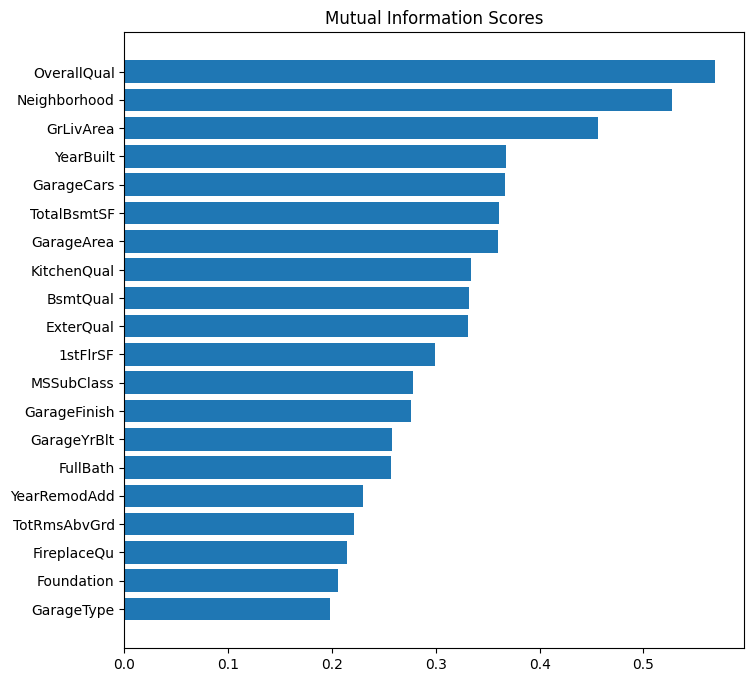

In [32]:
mi_scores = make_mi_scores(data_3NN_imputed, target)
print(mi_scores.head(20))
plt.figure(dpi=100, figsize=(8, 8))
plot_mi_scores(mi_scores.head(20))

In [33]:
data_with_target = pd.concat([data_3NN_imputed, target], axis = 1)

In [34]:
data = data_3NN_imputed.copy()

In [35]:
mi_scores.head(30)

,MI Scores
OverallQual,0.568914
Neighborhood,0.527584
GrLivArea,0.456031
YearBuilt,0.367460
GarageCars,0.366571
TotalBsmtSF,0.361299
GarageArea,0.359758
KitchenQual,0.333752
BsmtQual,0.331778
ExterQual,0.331403


In [36]:
important_features = mi_scores.head(30).index.tolist()

In [37]:
print(important_features)

['OverallQual', 'Neighborhood', 'GrLivArea', 'YearBuilt', 'GarageCars', 'TotalBsmtSF', 'GarageArea', 'KitchenQual', 'BsmtQual', 'ExterQual', '1stFlrSF', 'MSSubClass', 'GarageFinish', 'GarageYrBlt', 'FullBath', 'YearRemodAdd', 'TotRmsAbvGrd', 'FireplaceQu', 'Foundation', 'GarageType', '2ndFlrSF', 'LotFrontage', 'Fireplaces', 'LotArea', 'HeatingQC', 'Exterior2nd', 'OpenPorchSF', 'BsmtFinType1', 'BsmtFinSF1', 'Exterior1st']


In [38]:
data[important_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1460 non-null   object 
 1   Neighborhood  1460 non-null   object 
 2   GrLivArea     1460 non-null   float64
 3   YearBuilt     1460 non-null   float64
 4   GarageCars    1460 non-null   float64
 5   TotalBsmtSF   1460 non-null   float64
 6   GarageArea    1460 non-null   float64
 7   KitchenQual   1460 non-null   object 
 8   BsmtQual      1460 non-null   object 
 9   ExterQual     1460 non-null   object 
 10  1stFlrSF      1460 non-null   float64
 11  MSSubClass    1460 non-null   object 
 12  GarageFinish  1460 non-null   object 
 13  GarageYrBlt   1460 non-null   float64
 14  FullBath      1460 non-null   float64
 15  YearRemodAdd  1460 non-null   float64
 16  TotRmsAbvGrd  1460 non-null   float64
 17  FireplaceQu   1460 non-null   object 
 18  Foundation    1460 non-null 

In [39]:
important_num_features = data[important_features].select_dtypes(include=np.number).columns
important_cat_features = data[important_features].select_dtypes(include=object).columns

In [40]:
print(important_num_features)

Index(['GrLivArea', 'YearBuilt', 'GarageCars', 'TotalBsmtSF', 'GarageArea',
       '1stFlrSF', 'GarageYrBlt', 'FullBath', 'YearRemodAdd', 'TotRmsAbvGrd',
       '2ndFlrSF', 'LotFrontage', 'Fireplaces', 'LotArea', 'OpenPorchSF',
       'BsmtFinSF1'],
      dtype='object')


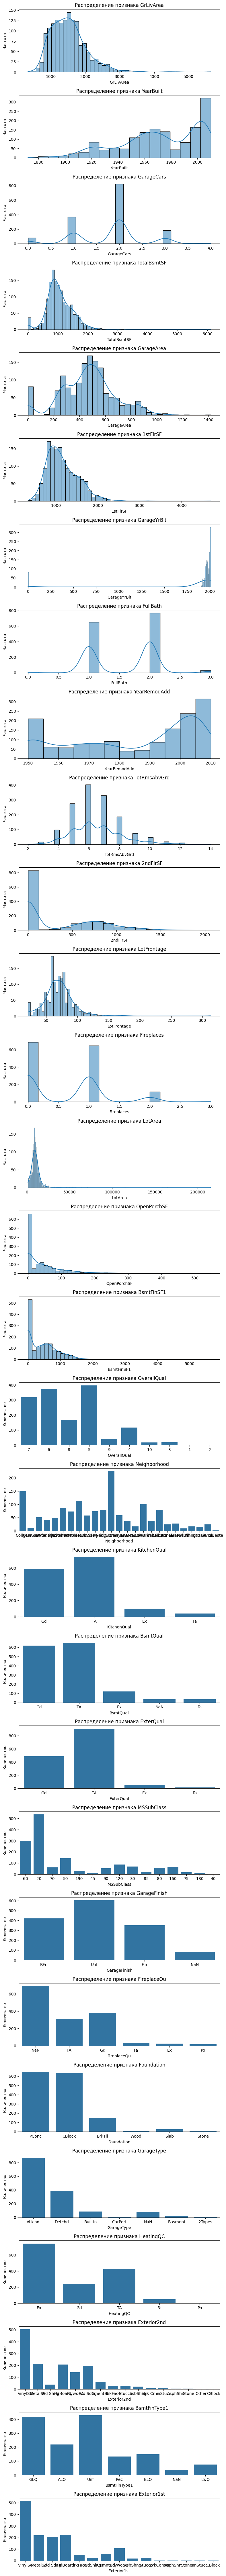

In [41]:
num_plots = len(important_num_features) + len(important_cat_features)
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(8, num_plots*3))

ax_index = 0
for feature in important_num_features:
    sns.histplot(data=data, x=feature, kde=True, ax=axes[ax_index])
    axes[ax_index].set_title(f'Распределение признака {feature}')
    axes[ax_index].set_xlabel(feature)
    axes[ax_index].set_ylabel('Частота')
    ax_index += 1

for feature in important_cat_features:
    sns.countplot(data=data, x=feature, ax=axes[ax_index])
    axes[ax_index].set_title(f'Распределение признака {feature}')
    axes[ax_index].set_xlabel(feature)
    axes[ax_index].set_ylabel('Количество')
    ax_index += 1

plt.tight_layout()
plt.show()

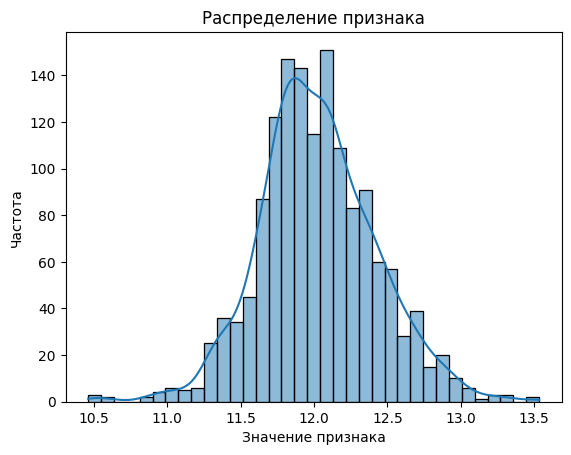

In [42]:
sns.histplot(data=data_with_target, x='log_SalePrice', kde=True) #kde=True добавляет кривую плотности
plt.title('Распределение признака')
plt.xlabel('Значение признака')
plt.ylabel('Частота')
plt.show()

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GarageYrBlt    1460 non-null   float64
 1   LotArea        1460 non-null   float64
 2   YrSold         1460 non-null   float64
 3   BsmtHalfBath   1460 non-null   float64
 4   MoSold         1460 non-null   float64
 5   MiscVal        1460 non-null   float64
 6   BsmtFinSF2     1460 non-null   float64
 7   Fireplaces     1460 non-null   float64
 8   EnclosedPorch  1460 non-null   float64
 9   BsmtUnfSF      1460 non-null   float64
 10  BsmtFinSF1     1460 non-null   float64
 11  BsmtFullBath   1460 non-null   float64
 12  GarageArea     1460 non-null   float64
 13  TotalBsmtSF    1460 non-null   float64
 14  FullBath       1460 non-null   float64
 15  1stFlrSF       1460 non-null   float64
 16  ScreenPorch    1460 non-null   float64
 17  LotFrontage    1460 non-null   float64
 18  3SsnPorc

OverallQual     0.568914
Neighborhood    0.527584
GrLivArea       0.456031
YearBuilt       0.367460
GarageCars      0.366571
TotalBsmtSF     0.361299
GarageArea      0.359758
KitchenQual     0.333752
BsmtQual        0.331778
ExterQual       0.331403
1stFlrSF        0.298998
MSSubClass      0.278377
GarageFinish    0.275903
GarageYrBlt     0.257889
FullBath        0.256327
YearRemodAdd    0.229942
TotRmsAbvGrd    0.221085
FireplaceQu     0.214391
Foundation      0.205652
GarageType      0.198275
2ndFlrSF        0.198190
LotFrontage     0.189828
Fireplaces      0.171273
LotArea         0.168269
HeatingQC       0.166565
Exterior2nd     0.164008
OpenPorchSF     0.157764
BsmtFinType1    0.152734
BsmtFinSF1      0.144882
Exterior1st     0.134901
Name: MI Scores, dtype: float64


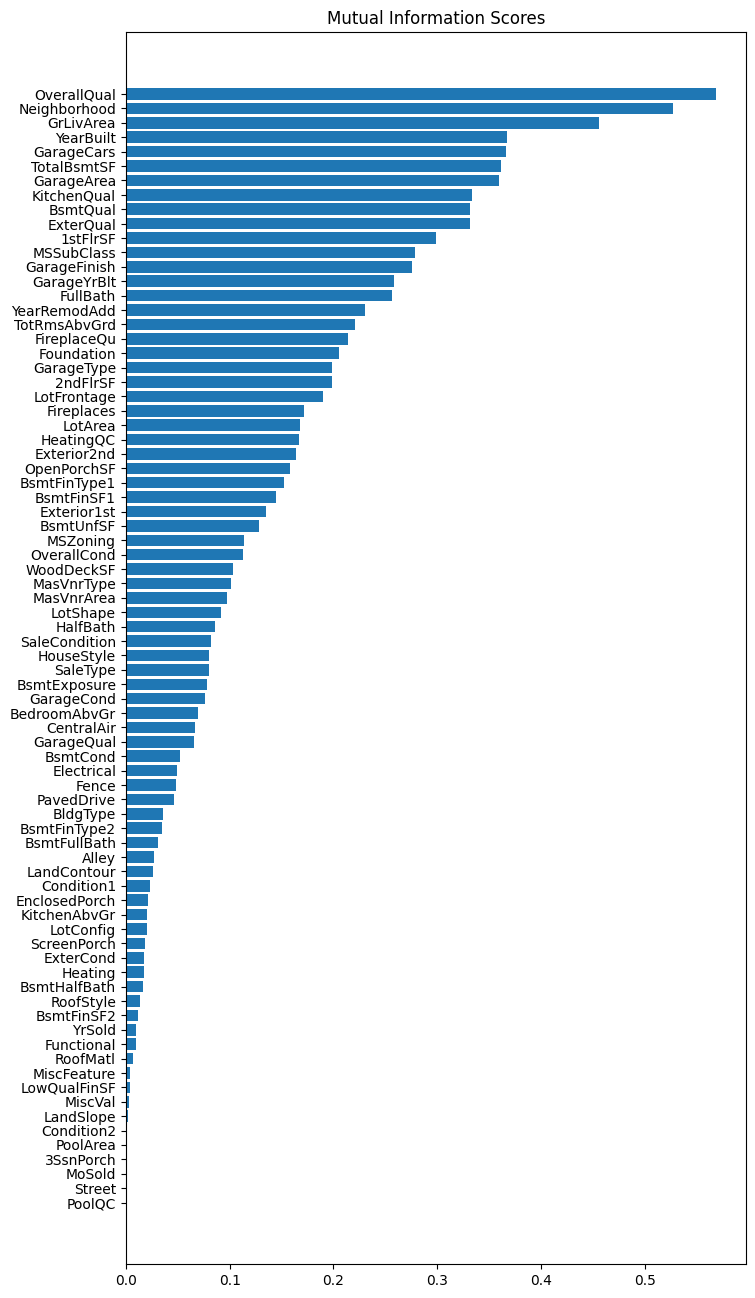

In [44]:
mi_scores = make_mi_scores(data, target)
print(mi_scores.head(30))
plt.figure(dpi=100, figsize=(8, 16))
plot_mi_scores(mi_scores.head(80))

In [47]:
data['LivAreaRatio'] = data['GrLivArea']/data['LotArea']
data['LastRemod'] = data['YrSold'] - data['YearRemodAdd']
data['ConAreaRatio'] = data['LotFrontage']/data['LotArea']
data['BsmtAreaRatio'] = data['TotalBsmtSF']/data['LotArea']
data['1stFlrRatio'] = data['1stFlrSF']/data['GrLivArea']
data['2stFlrRatio'] = data['2ndFlrSF']/data['GrLivArea']
data['WideGrLivArea'] = data['GrLivArea'] + data['BsmtFinSF1']
data['FireplacesAreaRatio'] = data['Fireplaces']/data['LotArea']
data['DeckAreaRatio'] = data['WoodDeckSF']/data['GrLivArea']
data['BathRatio'] = data['FullBath']/data['GrLivArea']
data['GarageAreaRatio'] = data['GarageArea']/data['LotArea']


In [48]:
GrLiv_sep_by_MSSubClass = pd.get_dummies(data.MSSubClass, prefix="MSSubClass", dtype = 'int')
GrLiv_sep_by_MSSubClass = GrLiv_sep_by_MSSubClass.mul(data.GrLivArea, axis=0)

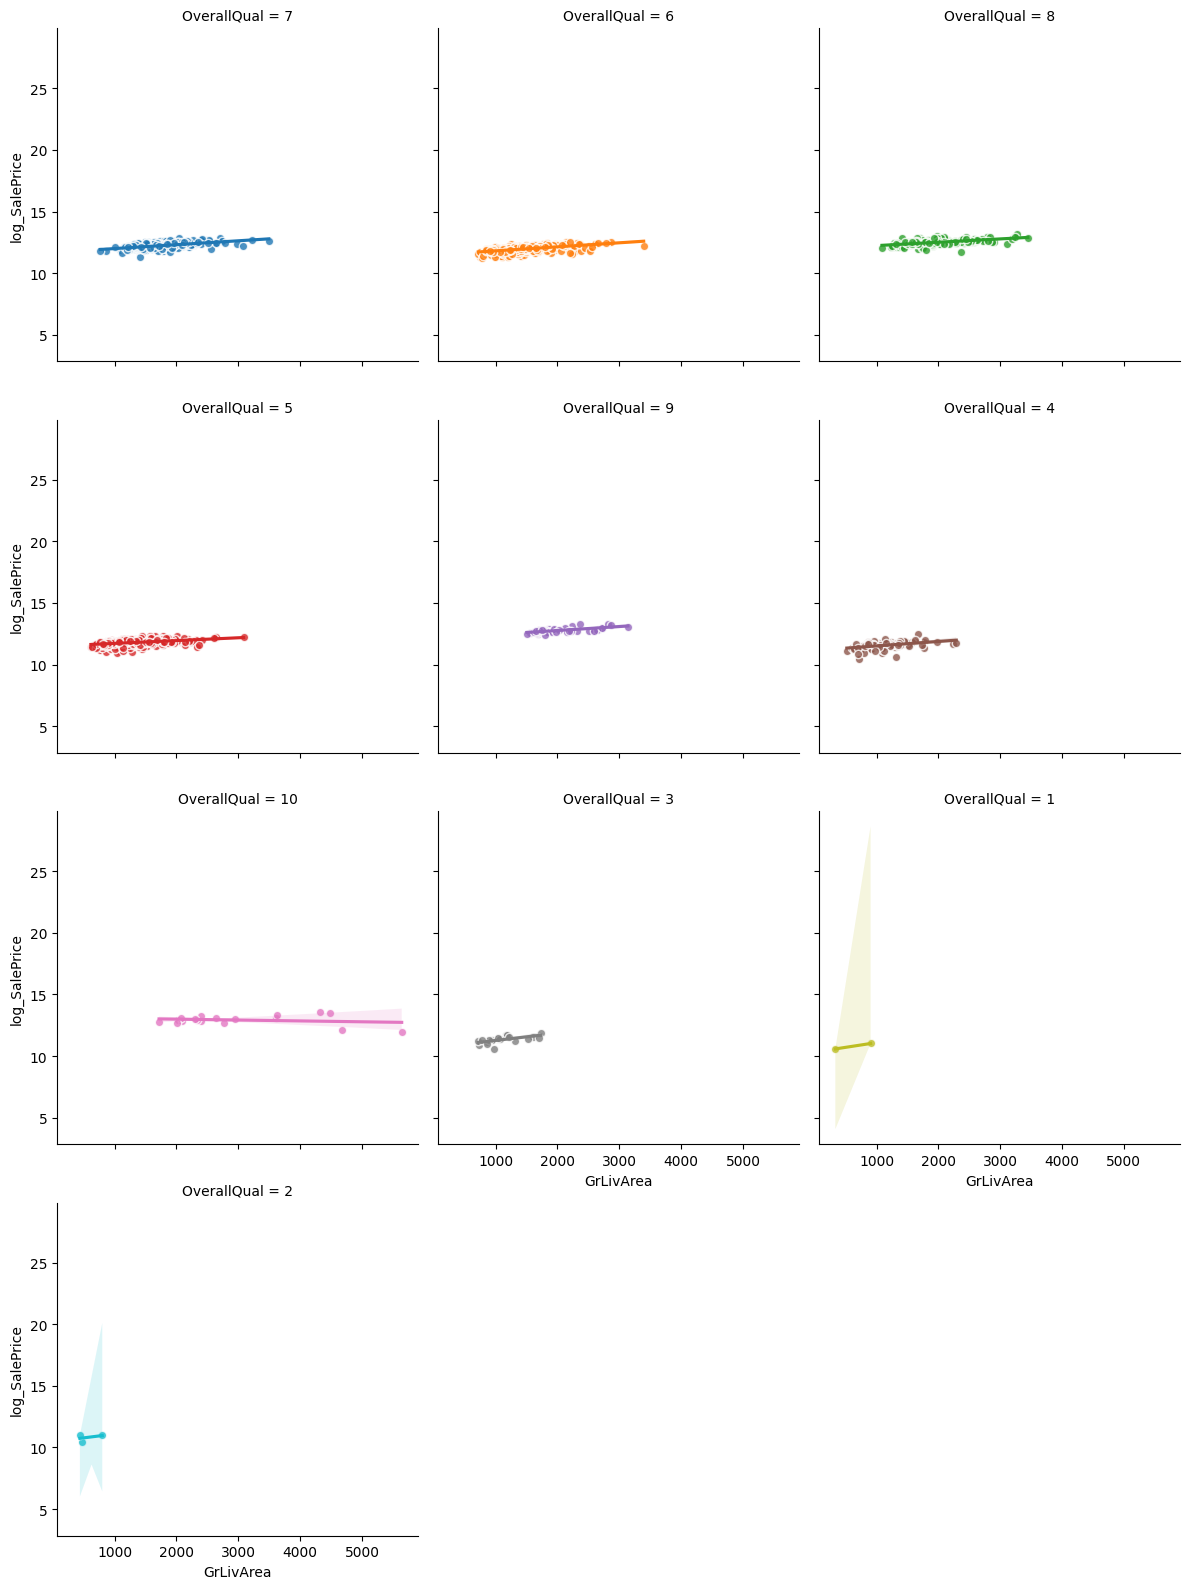

In [49]:
feature = "GrLivArea"

sns.lmplot(
    x=feature, y="log_SalePrice", hue="OverallQual", col="OverallQual",
    data= data_with_target, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
)

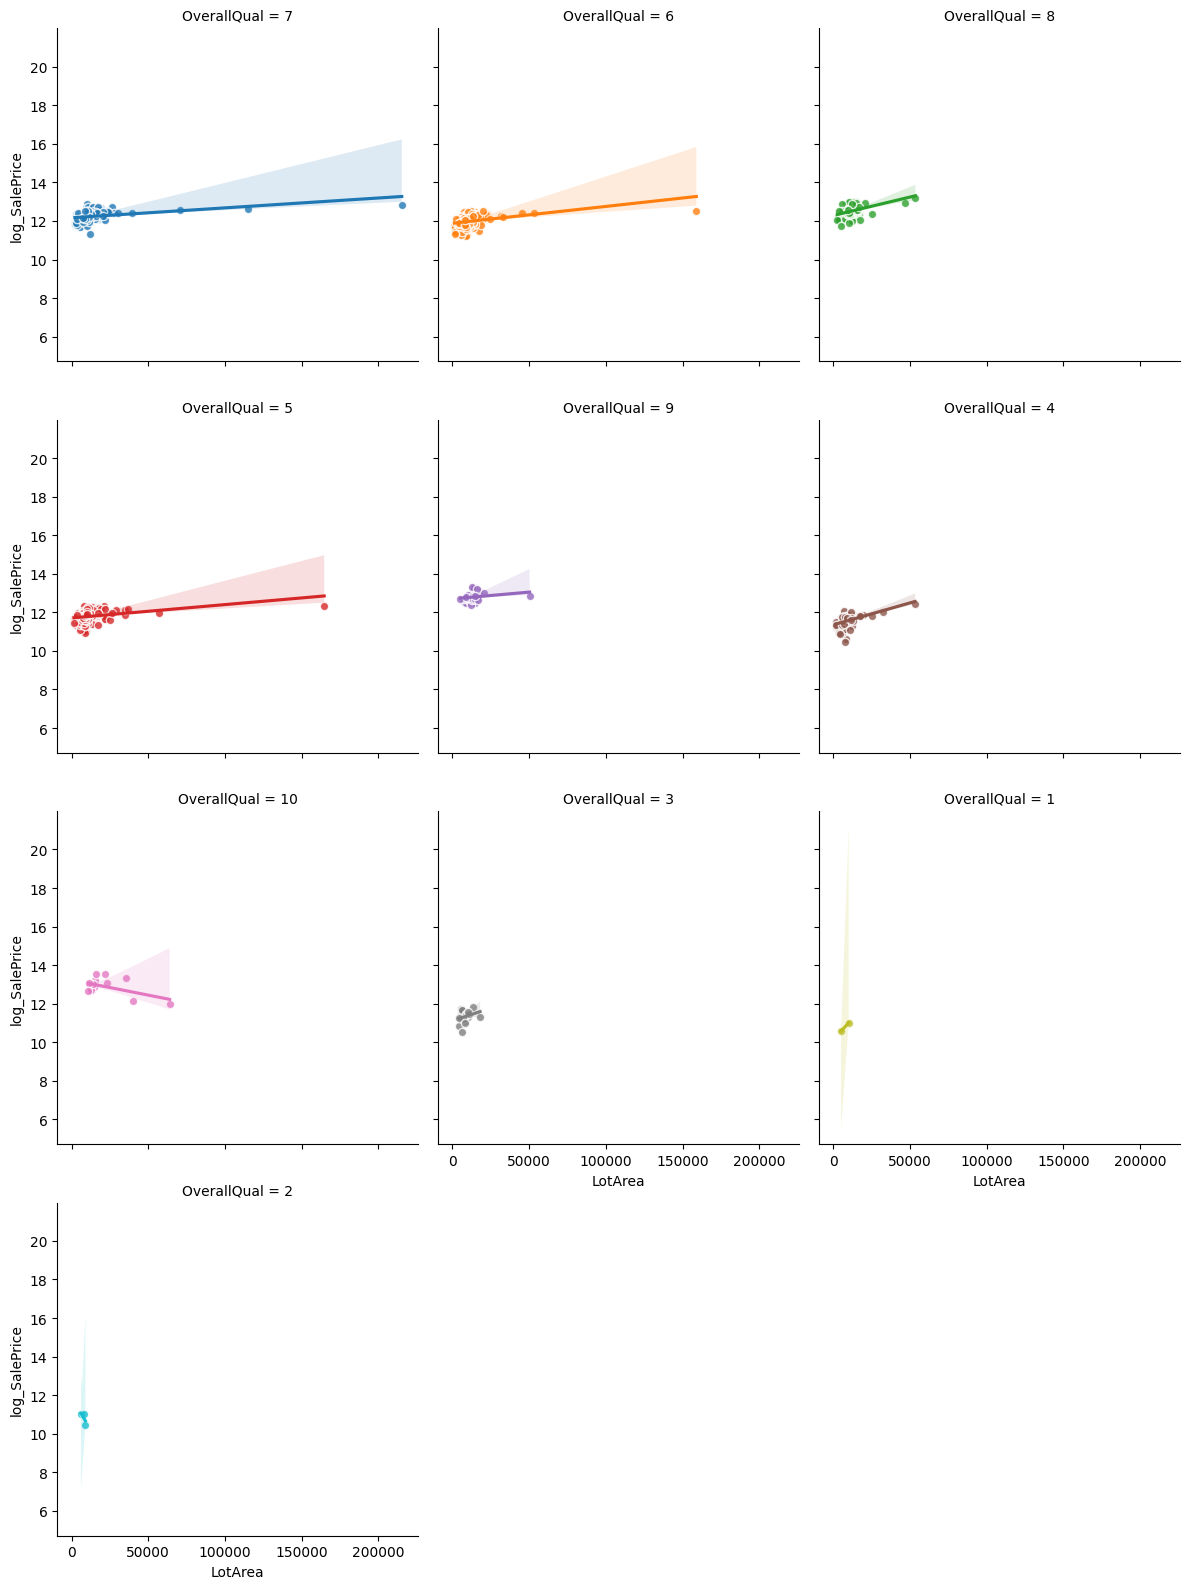

In [50]:
feature = "LotArea"

sns.lmplot(
    x=feature, y="log_SalePrice", hue="OverallQual", col="OverallQual",
    data= data_with_target, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
)

In [52]:
param_grid = {
    'learning_rate': [0.1],
    'depth': [10]
}

In [53]:
import catboost as cb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

X = data
y = target
model = cb.CatBoostRegressor(loss_function='RMSE', random_seed=42, iterations=300)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X, y, cat_features=cat_features)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X)
rmse = mean_squared_error(y, y_pred, squared=False)
print(rmse)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
0:	learn: 0.3730607	total: 120ms	remaining: 35.8s
1:	learn: 0.3492190	total: 660ms	remaining: 1m 38s
2:	learn: 0.3300130	total: 1.16s	remaining: 1m 54s
3:	learn: 0.3104988	total: 1.67s	remaining: 2m 3s
4:	learn: 0.2932976	total: 2.15s	remaining: 2m 7s
5:	learn: 0.2766188	total: 2.59s	remaining: 2m 7s
6:	learn: 0.2617460	total: 3.02s	remaining: 2m 6s
7:	learn: 0.2491647	total: 3.51s	remaining: 2m 8s
8:	learn: 0.2372321	total: 4.12s	remaining: 2m 13s
9:	learn: 0.2261833	total: 4.18s	remaining: 2m 1s
10:	learn: 0.2161576	total: 4.61s	remaining: 2m 1s
11:	learn: 0.2064507	total: 4.7s	remaining: 1m 52s
12:	learn: 0.1976707	total: 4.88s	remaining: 1m 47s
13:	learn: 0.1895447	total: 4.97s	remaining: 1m 41s
14:	learn: 0.1825656	total: 5.32s	remaining: 1m 41s
15:	learn: 0.1767302	total: 5.63s	remaining: 1m 39s
16:	learn: 0.1713016	total: 5.67s	remaining: 1m 34s
17:	learn: 0.1656858	total: 5.91s	remaining: 1m 32s
18:	learn: 0.1608873	tot

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
